In [2]:
data = [{"not":85, "kardes":4, "ders":"mat"},
        {"not":70, "kardes":3, "ders":"ing"},
        {"not":50, "kardes":3, "ders":"mat"},
        {"not":60, "kardes":2, "ders":"fiz"}]

In [3]:
#DictVectorizer sınıfı verimizi Numpy dizisine döndürmemizi sağlar.
from sklearn.feature_extraction import DictVectorizer

In [4]:
#Dönüşümün SciPy matrisi üretmesini üstemediğimizden "sparse=False"
vek = DictVectorizer(sparse=False, dtype=int)

In [5]:
#fit_transform ile dönüşümü uyguladık.
vek.fit_transform(data)

array([[ 0,  0,  1,  4, 85],
       [ 0,  1,  0,  3, 70],
       [ 0,  0,  1,  3, 50],
       [ 1,  0,  0,  2, 60]])

In [6]:
#get_feature_names veri etiketlerini görmemizi sağlar
vek.get_feature_names()

['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

In [7]:
#Veri boyutunun fazla olduğu durumlarda "sparse = True" yapılır.
vek = DictVectorizer(sparse=True, dtype=int)
vek.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [8]:
veri = ["hava iyi",
        "iyi insan",
        "hava bozuk"]

In [9]:
#CountVectorizer kütüphanesi, text türündeki verileri vektöre dönüştürür.Yani sayısal kodlara.
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vek = CountVectorizer()

In [12]:
X = vek.fit_transform(veri)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
import pandas as pd

In [14]:
#Dönüşüm sonrası sonuçları daha iyi görmek için DataFrame' i kullanırız.
pd.DataFrame(X.toarray(), columns=vek.get_feature_names())

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Polinomsal öz nitelikler oluşturalım. Ardından bunların saçılım grafiğini çizelim.
x = np.array([1,2,3,4,5])
y = np.array([5,3,1,2,7])

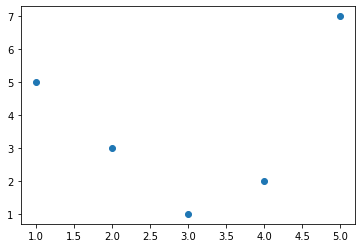

In [18]:
plt.scatter(x,y)

In [19]:
#LinearRegression Kütüphanesi ile modelimizi oluşturalım.
from sklearn.linear_model import LinearRegression

In [20]:
X = x[:, np.newaxis]

In [22]:
model = LinearRegression().fit(X,y)

In [23]:
y_fit = model.predict(X)

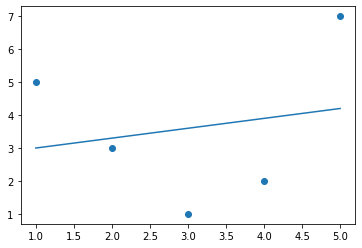

In [25]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [26]:
#Polinomsal ilişkileri görmek için PolynomialFeatures sınıfını kullanırız.
from sklearn.preprocessing import PolynomialFeatures

In [27]:
#degree polinomun derecesidir. 
pol = PolynomialFeatures(degree = 3, include_bias= False)

In [30]:
X2 = pol.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [31]:
model = LinearRegression().fit(X2,y)

In [32]:
y_fit = model.predict(X2)

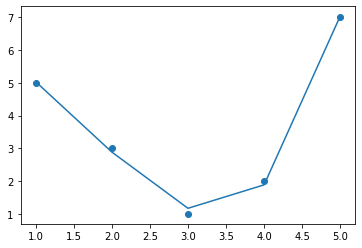

In [34]:
#Saçılım ve doğrusal grafiğimizi çizelim.
plt.scatter(x, y)
plt.plot(x, y_fit)

In [35]:
#nan kayıp ve eksik verileri göstermemizi sağlar. 
from numpy import nan

In [36]:
X = np.array([[1,nan,3],
            [5,6,9],
            [4,5,2],
            [4,6,nan],
            [9,8,1]])
y = np.array([10,13,-2,7,-6])

In [40]:
#SimpleImputer eksik verilerin yerine istatistik atamalar yapar.
from sklearn.impute import SimpleImputer

In [51]:
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [52]:
X2 = Imputer.fit_transform(X)

In [44]:
X2

array([[1.  , 6.25, 3.  ],
       [5.  , 6.  , 9.  ],
       [4.  , 5.  , 2.  ],
       [4.  , 6.  , 3.75],
       [9.  , 8.  , 1.  ]])

In [45]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([10.59852491, 13.45464873, -1.31399837,  4.99263952, -5.7318148 ])

In [46]:
from sklearn.pipeline import make_pipeline